# Задание 2 (Вариант 2)
Все выклыдки находятся в письменном виде в `notes/`

Распределение выборки: $X_1,\ldots,X_n \sim \operatorname{Geom}(\theta)$

Используемая параметризация: $p_{\theta}(x)=(1-\theta)^{x-1} \cdot \theta$, где x - это количество испытаний до первого успешного

Оценка методом моментов: $\hat{\theta}=\frac{1}{\overline{X}}$

Матожидание: $$E_{\theta}\frac{1}{\overline{X}}=
\frac{n}{\Gamma(n)} \cdot
\left( \frac{p}{q} \right)^n \cdot
\sum_{k=n}^{\infty} \frac{q^k}{k} \cdot \frac{\Gamma(k)}{\Gamma(k-n+1)}
$$

Смещение: $$E_{\theta}\frac{1}{\overline{X}} - \theta=
\frac{n}{\Gamma(n)} \cdot
\left( \frac{p}{q} \right)^n \cdot
\sum_{k=n}^{\infty} \frac{q^k}{k} \cdot \frac{\Gamma(k)}{\Gamma(k-n+1)}
- \theta
$$

Дисперсия: $$D_{\theta}\frac{1}{\overline{X}} =
\frac{n}{\Gamma(n)} \left(\frac{p}{q}\right)^n
\left(
    \sum_{k=n}^{\infty}\frac{q^k}{k^2} \frac{\Gamma(k)}{\Gamma(k-n+1)}-
    2\theta \frac{n}{\Gamma(n)} \left(\frac{p}{q}\right)
    \sum_{k=n}^{\infty}\frac{q^k}{k} \frac{\Gamma(k)}{\Gamma(k-n+1)}
\right)
$$

Среднеквадратическая ошибка: $$R(\hat{\theta},\theta) =
\frac{n}{\Gamma(n)}
\left( \frac{p}{q} \right)^n
\sum_{k=n}^{\infty} \frac{q^k}{k^2} \frac{\Gamma(k)}{\Gamma(k-n+1)} -
2\theta \frac{n}{\Gamma(n)}
\left( \frac{p}{q} \right)^n
\sum_{k=n}^{\infty} \frac{q^k}{k} \frac{\Gamma(k)}{\Gamma(k-n+1)} -
\theta^2
$$

Оценка среднеквадратической ошибки: найти не удалось :(

Нужно для $\theta=0.25$ сгенерировать 100 выборок и вычислить оценки и разницу между оценкой и настоящим значением.

In [1]:
import numpy as np

RNG = np.random.default_rng(0)

experiments = 100
n = 100

theta = 0.25

exps = np.array([RNG.geometric(theta, size=n) for _ in range(0, experiments)])

np.info(exps)

class:  ndarray
shape:  (100, 100)
strides:  (800, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x5600aca3f410
byteorder:  little
byteswap:  False
type: int64


Оценка отличается от настоящего значения более чем на 0.05 3 раз (всего 100 экспериментов)


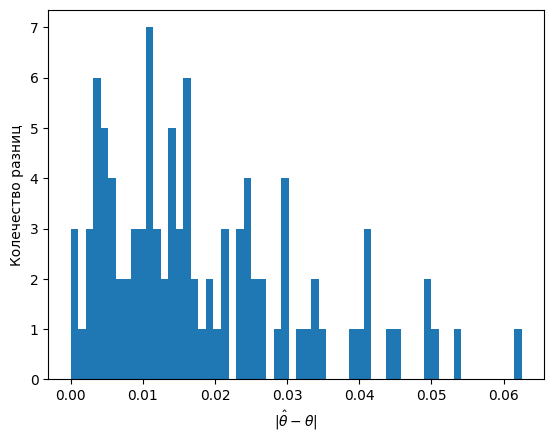

In [2]:
momentEstimator = np.ones(experiments) / (exps.sum(axis=1) / n)

diff = abs(momentEstimator - theta)
print("Оценка отличается от настоящего значения более чем на 0.05 {} раз (всего {} экспериментов)".format((diff > 0.05).sum(), experiments))

import matplotlib.pyplot as plt

plt.hist(diff, bins=60)
plt.xlabel(r'$\left|\hat{\theta}-\theta\right|$')
plt.ylabel('Колечество разниц')
plt.show()